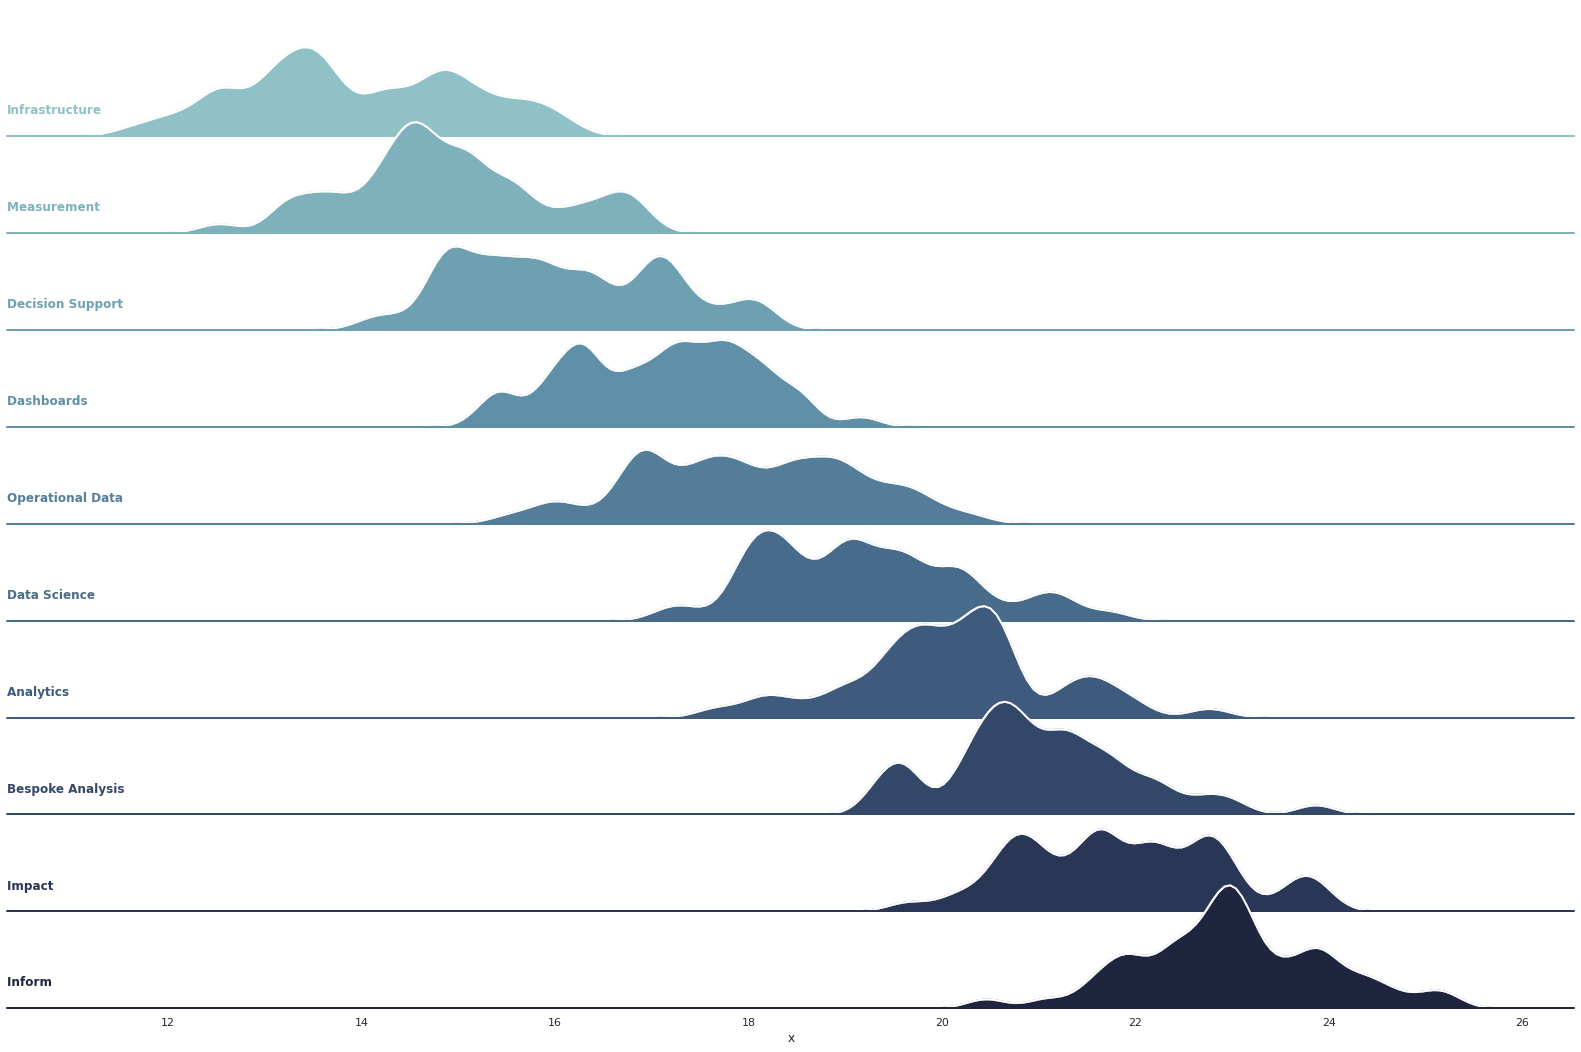

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 24, 20
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
words = ['Infrastructure', 'Measurement    ', 'Decision Support', 'Dashboards       ', 'Operational Data  ', 
         'Data Science       ', 'Analytics           ', 'Bespoke Analysis     ',  'Impact                ','Inform                 ']
#words = list('ABCDEFGHIJ')
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(words, 50)
df = pd.DataFrame(dict(x=x, g=g))
#m = df.g.map(ord)
m = df.g.map(len)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
#g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [20]:
g.fig.savefig('background.png')


In [8]:
m.head[20]

TypeError: 'method' object is not subscriptable